# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [9]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [59]:
# TODO: Select three indices of your choice you wish to sample from the dataset
import random

random.seed(123456)
indices = random.sample(data.index, 3)

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

display(samples - np.round(data.mean()))
display(samples - np.round(data.median()))

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,14039,7393,2548,6386,1333,2341
1,5981,14641,20521,2005,12218,445
2,31714,12319,11757,287,3881,2931


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2039,1597,-5403,3314,-1548,816
1,-6019,8845,12570,-1067,9337,-1080
2,19714,6523,3806,-2785,1000,1406


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5535,3766,-2208,4860,517,1375
1,-2523,11014,15765,479,11402,-521
2,23210,8692,7001,-1239,3065,1965


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [36]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

def cor_matrix(data):
    for i in list(data):
        # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
        new_data_x = data.drop(i, axis = 1)
        new_data_y = data[i]

        # TODO: Split the data into training and testing sets using the given feature as the target
        X_train, X_test, y_train, y_test = train_test_split(new_data_x, new_data_y, test_size = 0.25, random_state = 42)

        # TODO: Create a decision tree regressor and fit it to the training set
        regressor = DecisionTreeRegressor()
        reg = regressor.fit(X_train, y_train)

        # TODO: Report the score of the prediction using the testing set
        score = reg.score(X_test, y_test)
        print "Target feature " + i + " has coefficient of determination R^2 of the prediction: " + str(score)

cor_matrix(data)

Target feature Fresh has coefficient of determination R^2 of the prediction: -0.327306747847
Target feature Milk has coefficient of determination R^2 of the prediction: 0.142564046688
Target feature Grocery has coefficient of determination R^2 of the prediction: 0.673301072678
Target feature Frozen has coefficient of determination R^2 of the prediction: -0.229452171865
Target feature Detergents_Paper has coefficient of determination R^2 of the prediction: 0.358808568567
Target feature Delicatessen has coefficient of determination R^2 of the prediction: -2.89487265141


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** 

I used each of the features as target variable and the rests as predictor variables:

The scores of models that predict “Fresh”, “Frozen” and Delicatessen” have negative R^2 values, so the models fall to predict the features because there is no correlation. It tells me that these three features are good for identifying customer’s spending habits. 
    
The scores of models that predict “Milk”, and  "Detergents_Paper” have low positive R^2 values, so there are week correlations between “Milk” or “Detergents_Paper” and the rest of features.  It tells me that these two features can also be used for identifying customer’s spending habits 
    
The score of model that predict “Grocery” has relatively higher R^2 value, so there are moderate correlation between “Grocery” and the rest of features. It tells me that “Grocery” is not a good feature for identifying customer’s spending habits because it is purchased along with other features. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

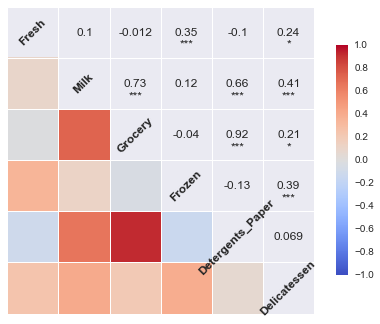

In [38]:
# Produce a scatter matrix for each pair of features in the data
# pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

import seaborn as sns
sns.corrplot(data)

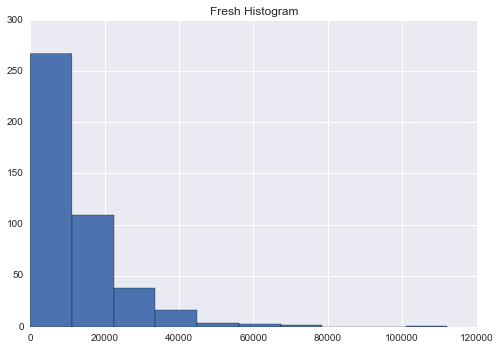

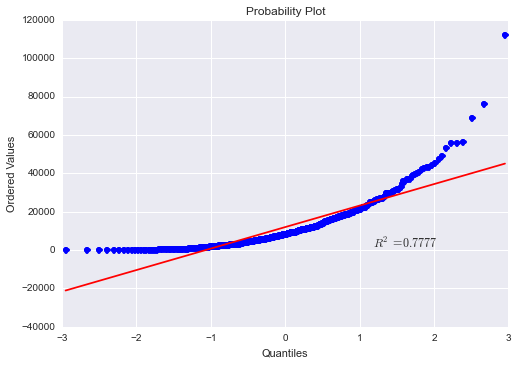

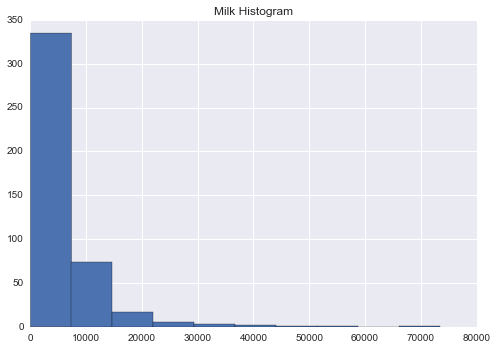

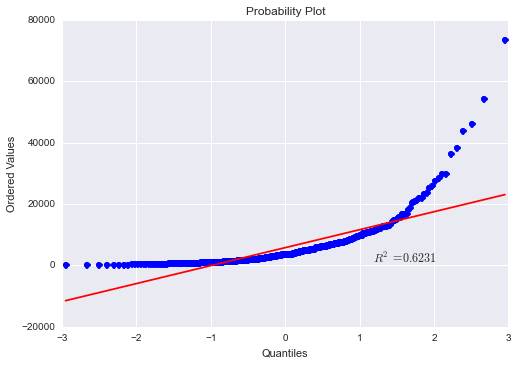

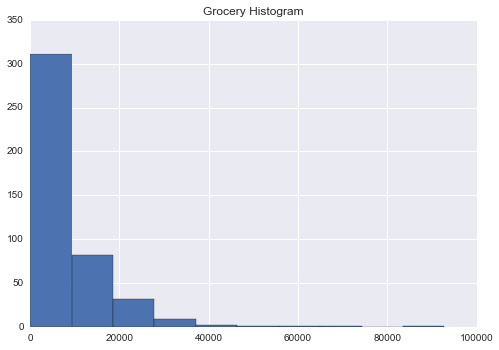

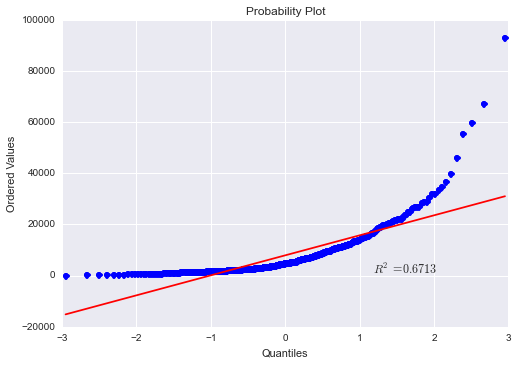

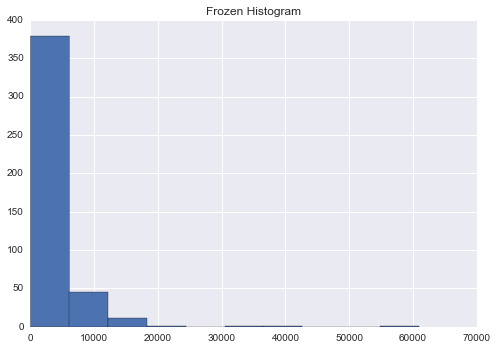

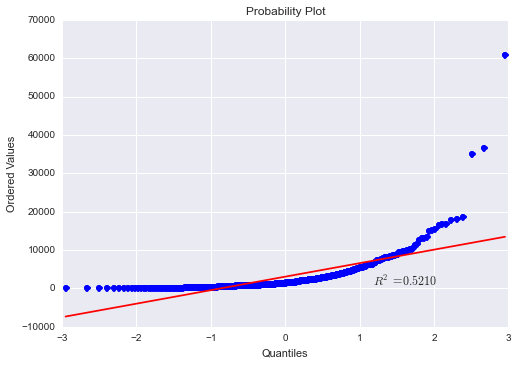

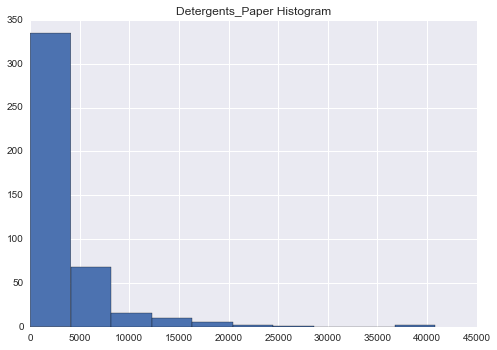

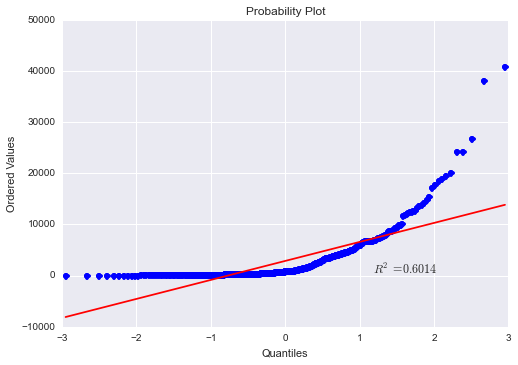

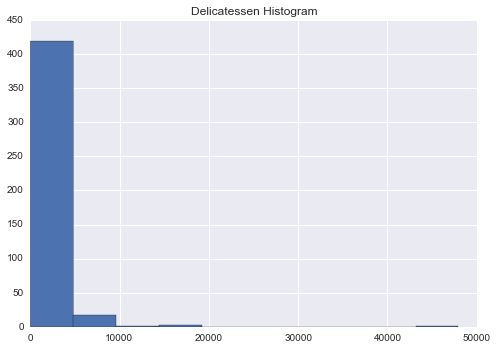

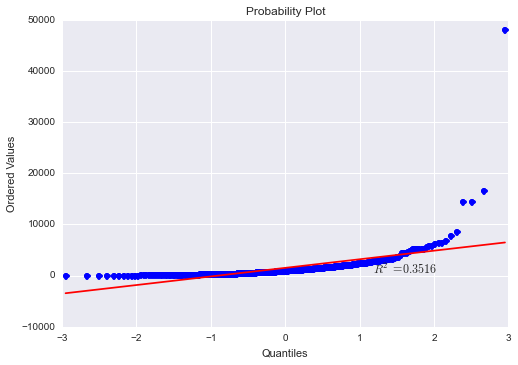

In [39]:
# Further more, we can check the normality of distribution of each variable by plotting histogram charts and QQ plots. 
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab

for i in data:
    # produce histogram chart for each variables
    plt.hist(data[i])
    plt.title(i + " Histogram")
    plt.show()
    # produce Q-Q plot for each variables
    stats.probplot(data[i], dist = 'norm', plot = pylab)
    pylab.show()

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** Based on the correplaton matrix plot above, I see strong correlation between “Grocery" and “Detergents_Paper”.  There are also moderate correlations between “Milk” and “Grocery”, as well as “Milk and Detergents_Paper”. So these confirms the previous findings by looking at the R^2 values of the regression models 

The data for all of these features are not normally distributed, and they all look right skewed.  This indicate that we need to normalized the data by doing some transformations. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

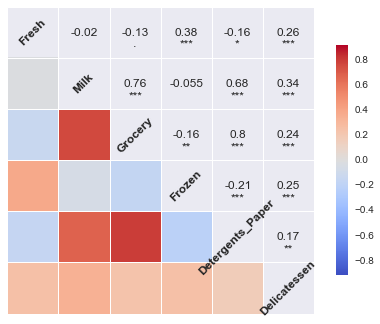

In [41]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
# pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
sns.corrplot(log_data)

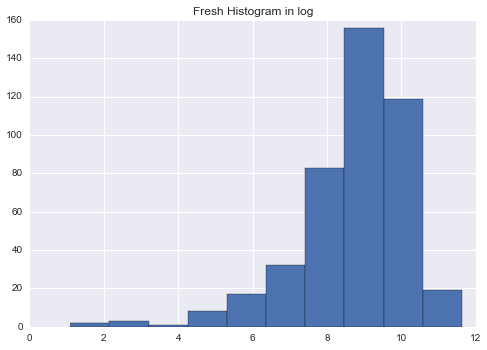

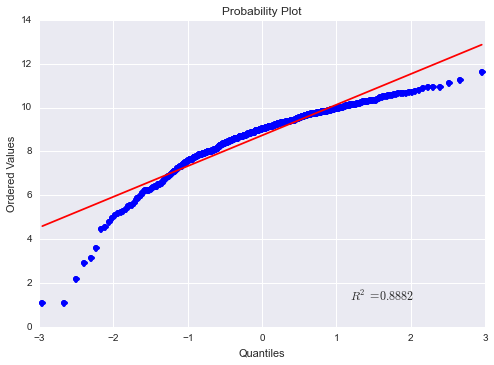

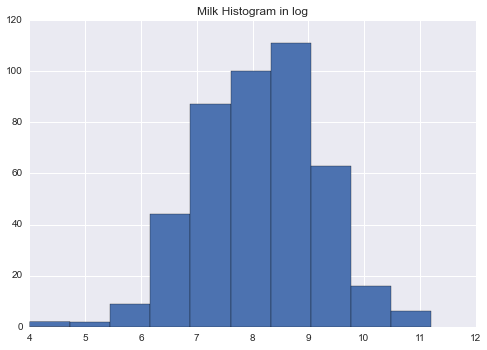

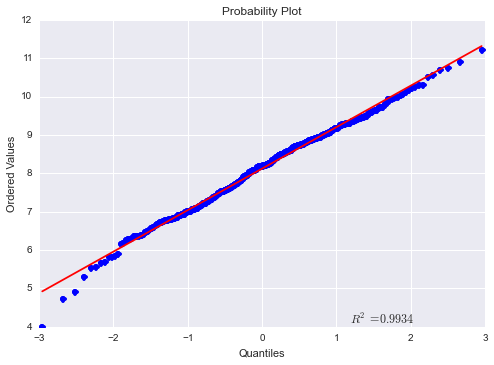

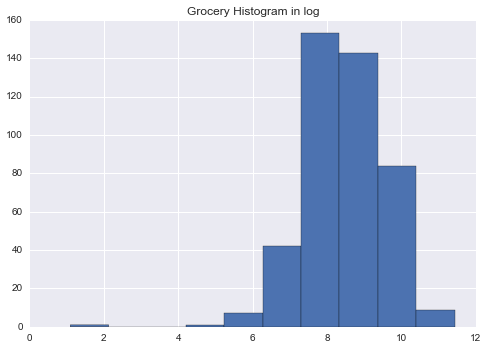

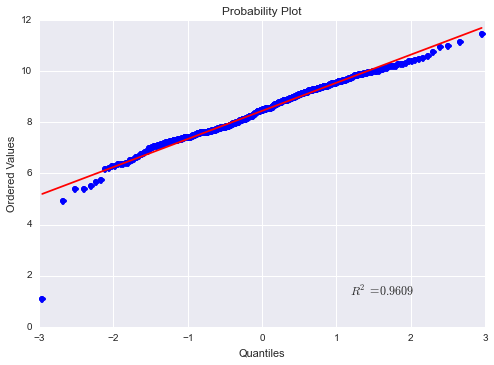

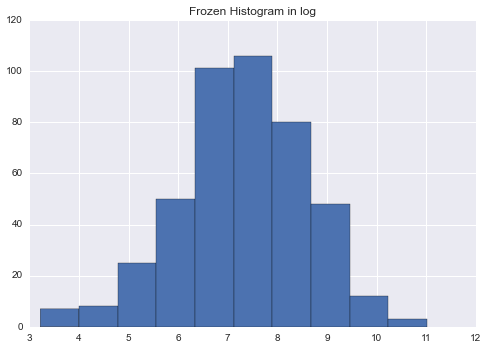

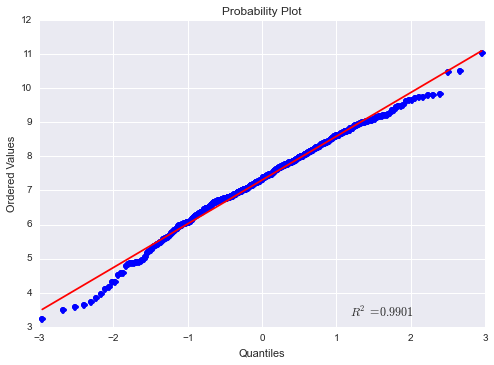

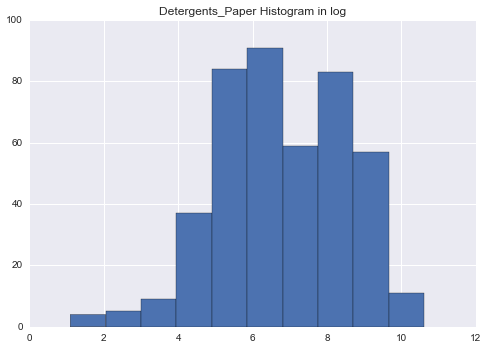

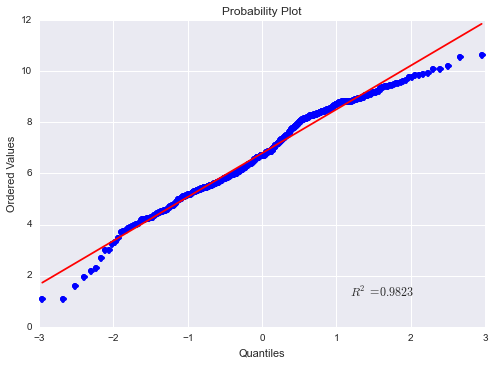

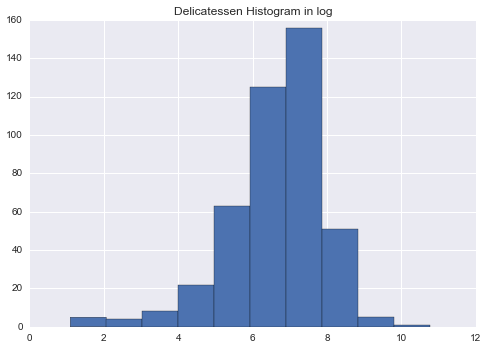

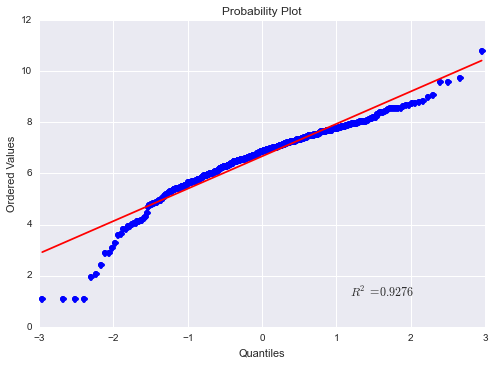

In [42]:
for i in data:
    # produce histogram chart for each variables
    plt.hist(log_data[i])
    plt.title(i + " Histogram in log")
    plt.show()
    # produce Q-Q plot for each variables
    stats.probplot(log_data[i], dist = 'norm', plot = pylab)
    pylab.show()

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [43]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.549594,8.908289,7.843064,8.761863,7.195187,7.758333
1,8.696343,9.591581,9.929204,7.603399,9.410666,6.098074
2,10.364514,9.418898,9.372204,5.659482,8.263848,7.983099


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [47]:
from collections import Counter

# For each feature find the data points with extreme high or low values
outlier_df = pd.DataFrame()
for feature in list(log_data):

    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)

    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)

    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)

    # Display the outliers
    outliers = log_data[(log_data[feature] <= (Q1 - step)) | (log_data[feature] >= (Q3 + step))]
    # print "Data points considered outliers for the feature '{}':".format(feature)
    outlier_df[feature] = pd.Series(outliers.index)

# Print outlier index of each of the features
display(outlier_df)  
    

# Count frequency of the outliers and rank them
    
outlier_count = np.array(outlier_df.values).ravel()
outlier_count = Counter(outlier_count[~np.isnan(outlier_count)])

print outlier_count


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,65,86,75,38,75,66
1,66,98,154,57,161,109
2,81,154,NaN,65,NaN,128
3,95,356,NaN,145,NaN,137
4,96,NaN,NaN,175,NaN,142
5,128,NaN,NaN,264,NaN,154
6,171,NaN,NaN,325,NaN,183
7,193,NaN,NaN,420,NaN,184
8,218,NaN,NaN,429,NaN,187
9,304,NaN,NaN,439,NaN,203


Counter({154.0: 3, 128.0: 2, 65.0: 2, 66.0: 2, 75.0: 2, 439.0: 1, 193.0: 1, 264.0: 1, 137.0: 1, 142.0: 1, 145.0: 1, 412.0: 1, 285.0: 1, 161.0: 1, 420.0: 1, 38.0: 1, 171.0: 1, 429.0: 1, 175.0: 1, 304.0: 1, 305.0: 1, 183.0: 1, 184.0: 1, 57.0: 1, 187.0: 1, 203.0: 1, 325.0: 1, 289.0: 1, 81.0: 1, 338.0: 1, 86.0: 1, 343.0: 1, 218.0: 1, 95.0: 1, 96.0: 1, 353.0: 1, 98.0: 1, 355.0: 1, 356.0: 1, 357.0: 1, 233.0: 1, 109.0: 1})


In [61]:
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [154, 128, 65, 66, 75]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

# Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** We can see from the outputs above, record 154, 128, 65, 66, and 75 occur more than once, so we remove these records becasue of they are "higher" frequency outliers.  Removing these data points will improve the normality of each of the features without losing too many observations.

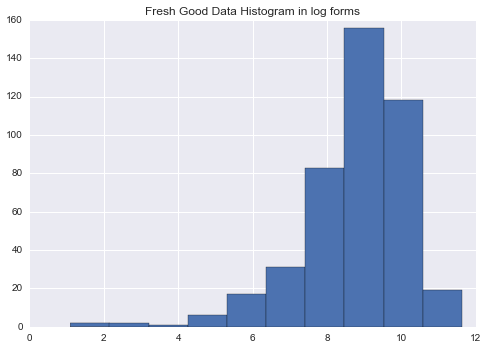

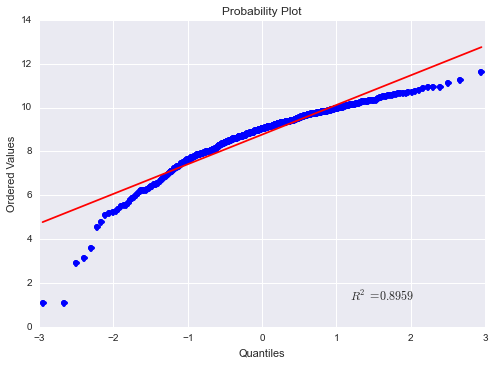

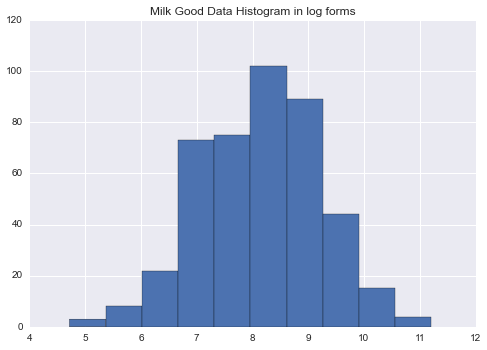

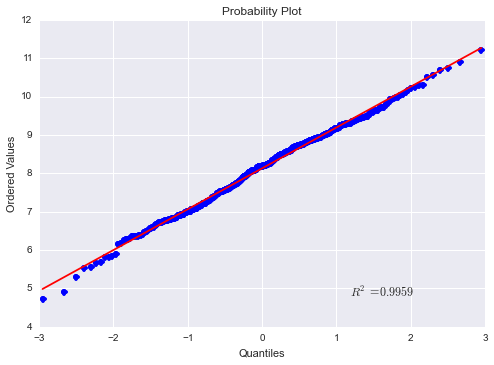

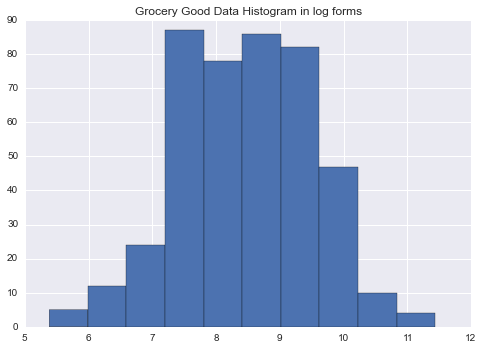

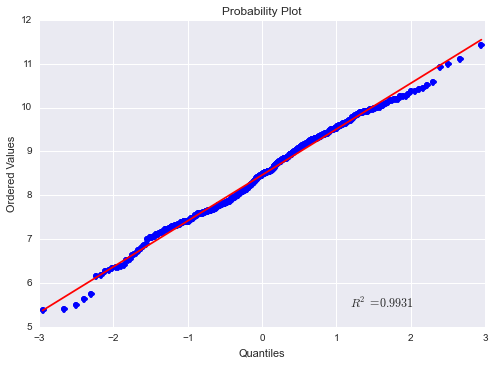

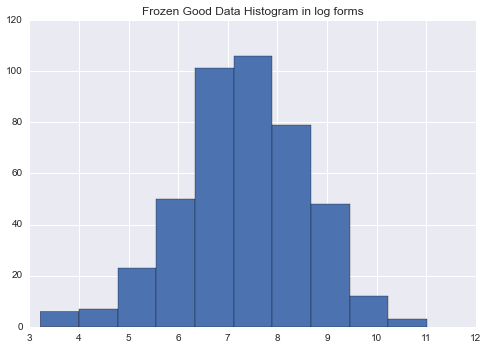

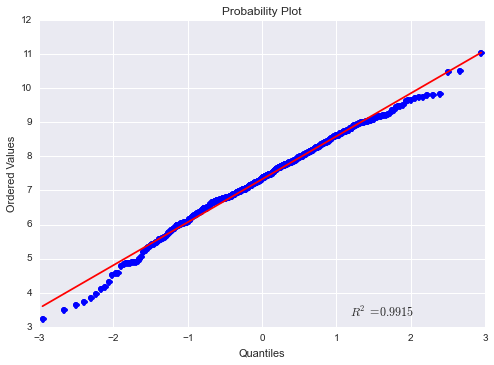

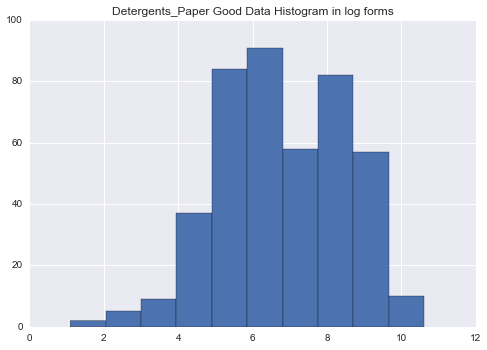

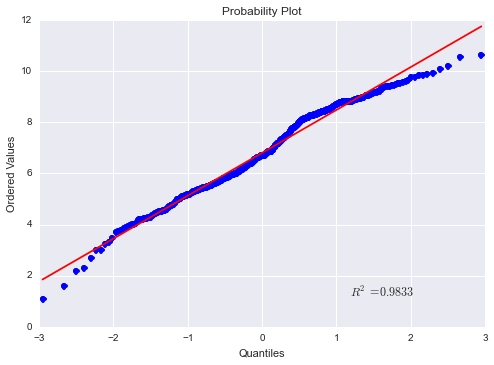

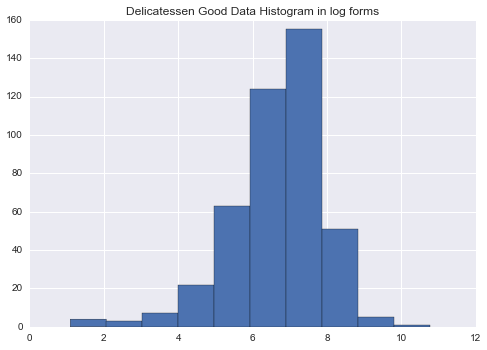

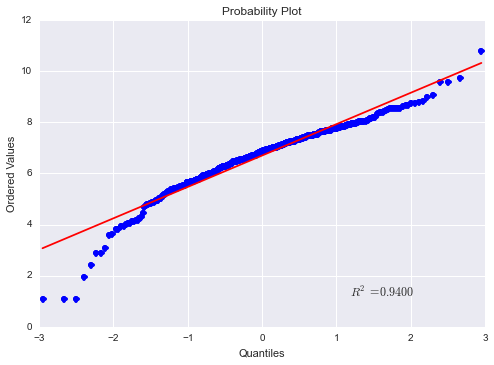

In [62]:
for i in good_data:
    # produce histogram chart for each variables
    plt.hist(good_data[i])
    plt.title(i + " Good Data Histogram in log forms")
    plt.show()
    # produce Q-Q plot for each variables
    stats.probplot(good_data[i], dist = 'norm', plot = pylab)
    pylab.show()

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.1126,1.8858,0.5508,0.4506,0.1517,0.9266
1,3.0662,0.2561,-0.7621,1.2047,-0.2324,0.0695
2,2.2406,1.2419,-1.0729,-1.9589,-0.2160,0.1782


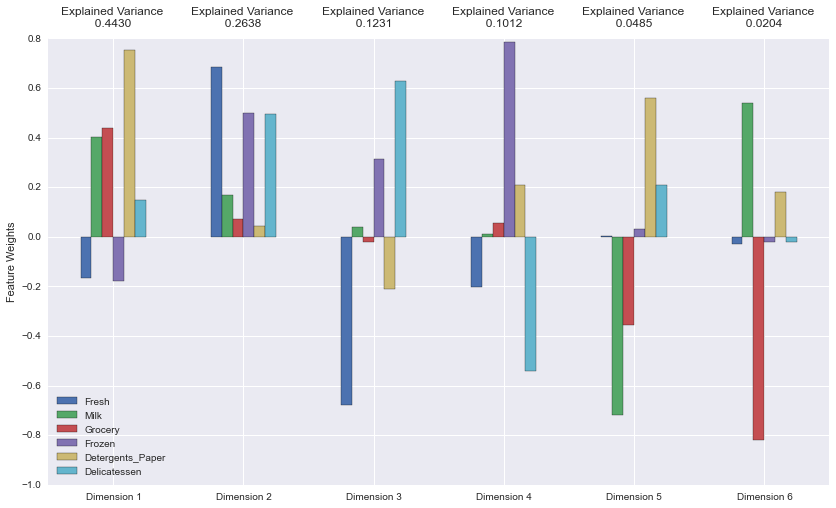

In [77]:
from sklearn.decomposition.pca import PCA
# TODO: Apply PCA to the good data with the same number of dimensions as features
pca = PCA(n_components = 6)
good_data_pca = pca.fit_transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4',
                                                         'Dimension 5', 'Dimension 6']))


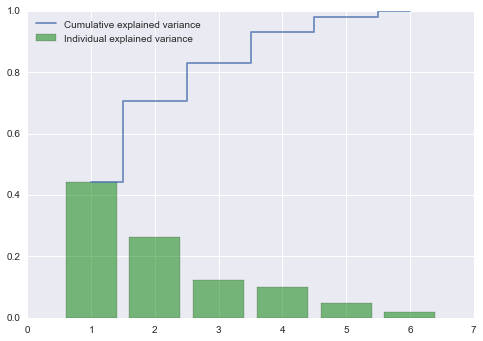

[ 0.44302505  0.70681723  0.82988103  0.93109011  0.97959207  1.        ]


In [94]:
# Calculate and plot the cummulative sum of explained variances by numbers of principle components
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, 7), var_exp, align = 'center', alpha = 0.5, color = 'Green', label = 'Individual explained variance')
plt.step(range(1,7), cum_var_exp, where = 'mid', alpha = 0.8, label = 'Cumulative explained variance')
plt.set_ylabel = ('Explained Variance Ratio')
plt.set_xlabel = ('Principal Components')
plt.legend(loc = 'best')
plt.show()

print np.cumsum(pca.explained_variance_ratio_)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** As shown above in the chart, the first and second principla components explained total 70.7% of variance. The first four principal components explained total 93.1% of variance.

Dimension 1 represents the customers who spend more on Milk, Grocery, and Detergents_Paper, and less on Fresh and Frozen. 

Dimension 2 represents the customers who spend more on every categories, especially more on Fresh, Frozen, and Delicatessen. 

Dimension 3 represents the customers who spend more on Fresh, Detergents_Paper, and less on Delicatessen.

Dimension 4 represents the customer who spend much less on Fresh and Delicatessen, more on Frozen.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [95]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.1126,1.8858,0.5508,0.4506,0.1517,0.9266
1,3.0662,0.2561,-0.7621,1.2047,-0.2324,0.0695
2,2.2406,1.2419,-1.0729,-1.9589,-0.2160,0.1782


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [102]:
from sklearn.decomposition.pca import PCA

# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components=2)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.fit_transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [104]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.1126,1.8858
1,3.0662,0.2561
2,2.2406,1.2419


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** Gaussian Mixture Model ( GMM)  is good at handling soft clustering. If it is hard to determine which cluster a data point should fit in, we can estimate based on probability. GMM works well on the data in different scales. GMM is also very fast, but the result is not stable. Unlike K-Mean, the clustering is a little different each time. 

K- Means is computationally fast,  even when handles a large number of variables. It is easy to implement and explain to non-technical audiences. K-Means is not good at finding clusters of different scales.  

Since we have use performed PCA on the data set, I would choose K - Means over GMM because the dataset has been converted to linearly independent vectors. 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [105]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for i in range(2, 11):
    clusterer = i
    km = KMeans(n_clusters= clusterer)
    preds = km.fit_predict(reduced_data)
    centers = km.cluster_centers_
    score = silhouette_score(reduced_data, preds)
    print "Selecting " + str(i) + " clusters gives the silhouette coefficient value " + str(score)

Selecting 2 clusters gives the silhouette coefficient value 0.426281015469
Selecting 3 clusters gives the silhouette coefficient value 0.39689092645
Selecting 4 clusters gives the silhouette coefficient value 0.331779859971
Selecting 5 clusters gives the silhouette coefficient value 0.353692986227
Selecting 6 clusters gives the silhouette coefficient value 0.355154091037
Selecting 7 clusters gives the silhouette coefficient value 0.357860814851
Selecting 8 clusters gives the silhouette coefficient value 0.355630271455
Selecting 9 clusters gives the silhouette coefficient value 0.365897006655
Selecting 10 clusters gives the silhouette coefficient value 0.363832158976


In [106]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = 2
km_best = KMeans(n_clusters = clusterer) 

# TODO: Predict the cluster for each data point
preds = km_best.fit_predict(reduced_data)

# TODO: Find the cluster centers
centers = km_best.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = km_best.fit_predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

print sample_preds
print score

[1 0 0]
0.426281015469


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** 2 number of clusters gives the best silhouette score , 0.426

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

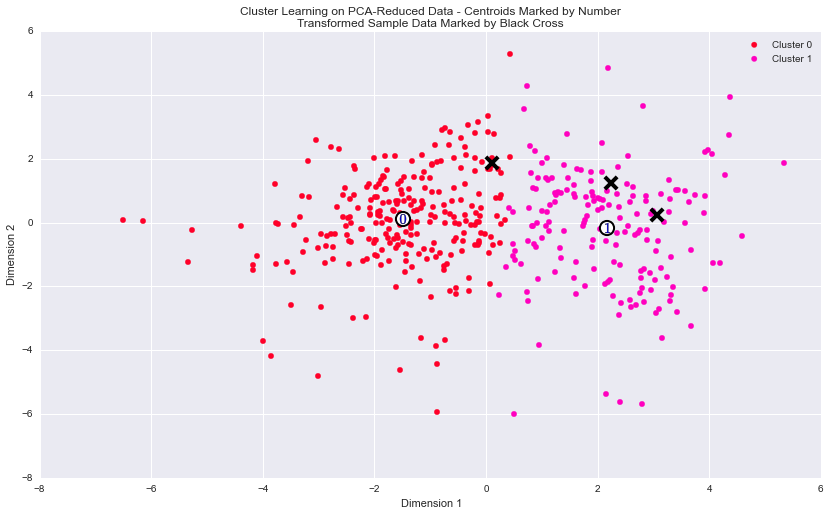

In [120]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867,1897,2477,2088,294,681
Segment 1,4005,7900,12104,952,4561,1036


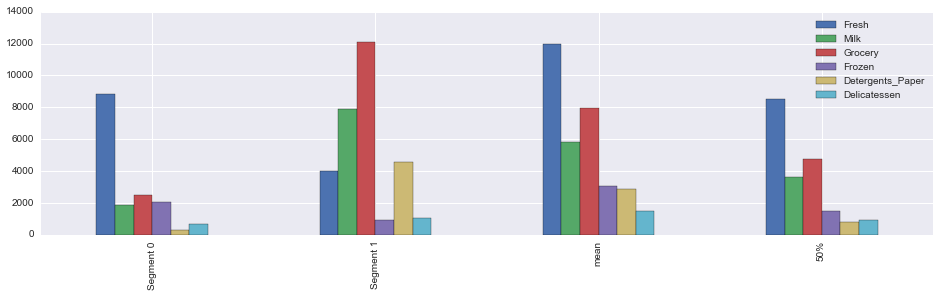

In [147]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

# plot the segements and compare them to the mean of the data set
true_centers = true_centers.append(data.describe().ix['mean']) 
true_centers = true_centers.append(data.describe().ix['50%']) 
true_centers.plot(kind = 'bar', figsize = (16, 4))

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:** 

As we can see from the bar chart above to compare the two segments to mean and median of the data set:

Segment 0 - Fresh is closer to the median, and lower than mean. Milk and Grocery are much lower than mean and median. Frozen is slightly lower than mean but higher than median. The Detergents_Paper and Delicatessen are lower than median and mean. So it could represent the customers who spend less on every categories but Fresh, probably retailer

Segment 1 - Fresh is lower than median and mean. Milk, Grocery, and Detegents_Paper are much higher than median and mean. Forzen is lower than median and mean. Delicateseen is close to mean. So it could represent the customers who spend less on Fresh, but much more on others, probably a restaruant.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


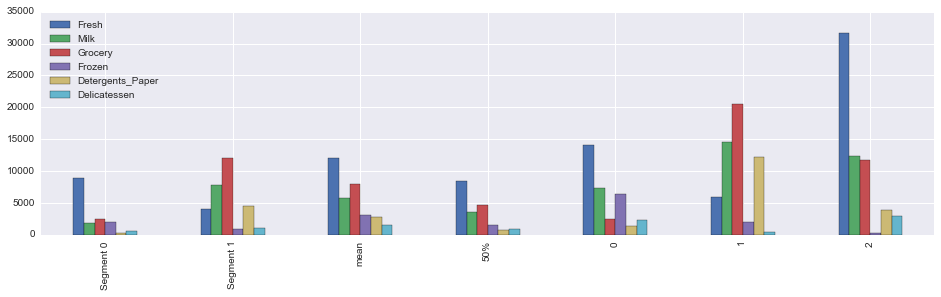

In [148]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    
# plot the samples and compare them to the centers of clusters

for i in range(samples.shape[0]):
    true_centers = true_centers.append(samples.loc[i])

true_centers.plot(kind = 'bar', figsize = (16, 4))


**Answer:**
Sample point 0 is predicted in Cluster 1. The values of Milk is higher than mean and median, Grocery is lower than than mean and median. Frozen and Delicatessen are higher than median and mean. It could be either a restaurant or retailer. The prediction tells us that the sample is a restaruant, which algins with the initial assumption.

Sample point 1 is in Cluster 0. The value of Fresh is lower than median and mean. The Milk, Grocery, and Detergents_Paper are much higher than median and mean. It seems more likely in cluster 1, a retailer. However, the prediction tells us that the sample is a retailer, which also aligns with the initial assumption.

Sample point 2 is in Cluster 0, The value of Fresh is much higher than mean and median. Milk and Grocery are also higher than mean and median. However, the prediction tells us that the sample is a retailer,  which aligns with the initial assumption.


## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

 **Answer:** I would like first use 2 clusters K-mean algorithm to cluster the customers to two segments: segment 0, representing restaurants; and segment 2, representing retailers.

Since the pattern of spending in different segments are very different, the impact of change of delivery service will be different the two segments. Therefore,  I would do A/B test separately in the two segments .

To perform A/B test in segment 0, I would randomly select sample from segment 0 and break the samples to two groups: group A and group B. Change the delivery schedule from 5 days to 3 days in group A, and then compare the results with the group B which keep the 5 days delivery schedule.  The null - hypothesis is that there no impact on the customer attrition. If the results is statistically significant, we reject the null-hypothesis and conclude that the change of delivery schedule does impact the customer attrition, so we should not change the delivery service for this segment. If the result is statistically insignificant, we can’t reject the null-hypothesis and conclude that we could change the delivery service because it probably would not impact customer attrition in this segment.

Similarly for segment 1, we randomly select samples from segment 1 and break the samples to group A and group B.  Change the delivery schedule from 5 days to 3 days in group A and keep the delivery schedule of group B unchanged. And then draw conclusions based on the results of similar test that we just did in segment 0. 
 

### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:** The distributor could use the first two principle components as predictor variables to build a linear regression model to predict the new features. Since the first two components are latent variables and have no corrections each other, the linear regression model built upon the two components will avoid multicollinearity issue.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

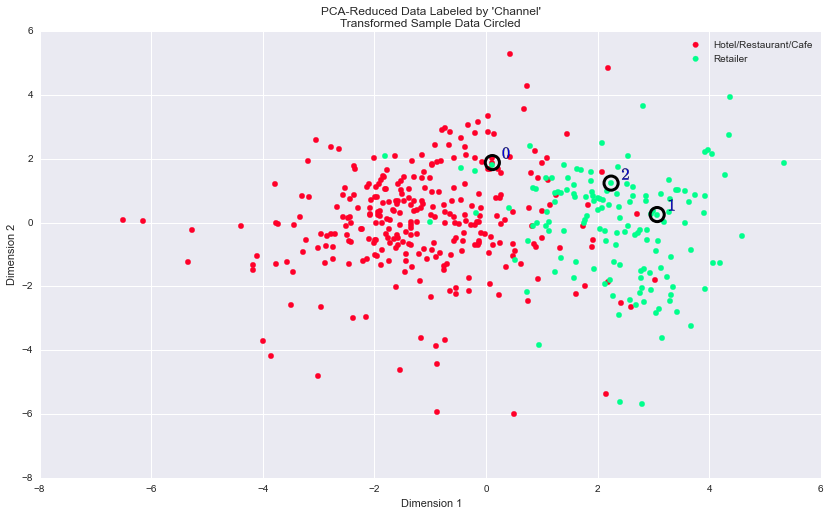

In [119]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** This charts indicates that the sample 0 is a retailer, and sample 1 and 2 are Hotel/Restaurant/Cafe. The separation between the two clusters is clear, and the classification of the samples well match the segments we assign previously for the 3 samples.  

This chart aligns with our initial assumptions that sample 0 is a a restaurant, sample 1 and 2 are retailers. 

The clusters are same as the K-mean chart in questions 9  that sample 0 is in one cluster, while sample 1 and 2 are in the other cluster. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.